# All path

- lines_zip : 모든 경로 리스트
- lines_x : 모든 경로의 x좌표 값
- lines_y : 모든 경로의 y좌표 값
- edges : 모든 edge 리스트

In [29]:
import csv
f = open('South_Korea_airport_toy_example.csv','r')
next(f) ## 첫째줄 건너뛰기
rdr = csv.reader(f)
lines_zip = list()    

for line in rdr:
    lines_zip.append([line[4], line[5]])
    print(line)
 
f.close()

['Incheon', 'International', 'ICN', 'RKSI', '126.4498', '37.4465']
['Jeju', 'International', 'CJU', 'RKPC', '126.4928', '33.5111']
['Cheongju', 'International', 'CJJ', 'RKTU', '127.4989', '36.7164']
['Yangyang', 'International', 'YNY', 'RKNY', '128.6689', '38.0611']
['Pohang', 'Domestic', 'KPO', 'RKTH', '129.4205', '35.9879']
['Gimhae', 'International', 'PUS', 'RKPK', '128.9381', '35.1794']


In [30]:
## 문자열 -> float
edges = [list(map(float, x)) for x in lines_zip]
print(edges)

lines_x = list() # 모든 경로의 x좌표 값
lines_y = list() # 모든 경로의 y좌표 값

for i in edges:
    lines_x.append(i[0])
    lines_y.append(i[1])
print(lines_x)
print(lines_y)  

[[126.4498, 37.4465], [126.4928, 33.5111], [127.4989, 36.7164], [128.6689, 38.0611], [129.4205, 35.9879], [128.9381, 35.1794]]
[126.4498, 126.4928, 127.4989, 128.6689, 129.4205, 128.9381]
[37.4465, 33.5111, 36.7164, 38.0611, 35.9879, 35.1794]


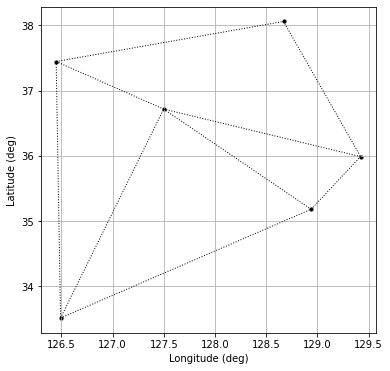

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import collections
import numpy as np
import csv

#csv 파일 불러오는 함수 필요
# 불러와서 좌표 형태(x,y)로 리스트로 저장 -> zip함수 쓰면 좋음
# for문을 통해 리스트 내의 것들 점찍고 선긋고

a = (126.4498, 37.4465) #1 Incheon
b = (126.4928, 33.5111) #2 Jeju
c = (127.4989, 36.7164) #3 Cheongju
d = (128.6689, 38.0611) #4 Yangyang
f = (128.9381, 35.1794) #5 pohang
e = (129.4205, 35.9879) #6 Gimhae

## 주어진 vertex 9개
vertex = list()
vertex.append([a, b])
vertex.append([a, c])
vertex.append([a, d])
vertex.append([b, c])
vertex.append([b, f])
vertex.append([c, f])
vertex.append([c, e])
vertex.append([d, e])
vertex.append([f, e])

lines=collections.LineCollection(vertex,  linestyles='dotted', linewidth=1, color = 'black')

fig,axes=plt.subplots(figsize=(6,6))
plt.grid(True)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
axes.add_collection(lines)
plt.scatter(lines_x, lines_y, marker='o', color='black', s=10)
axes.autoscale()
plt.show()


# Shortest_path

In [32]:
import csv
f = open('shortest_path.csv','r')
rdr = csv.reader(f)

# 한줄씩 읽어오기
for line in rdr:
    print(line)
 
f.close()

['1', '3', '4', '5']


In [33]:
## shortest_path가 저장될 리스트
lines = list()
## 경로 저장 (문자열로 저장됨)
for i in range(0,len(line)):
    if(i+1 != len(line)):
        lines.append([line[i], line[i+1]])
        print(lines[i])

## 문자열 -> Int    
lines = [list(map(int, x)) for x in lines]

for i in range(0,len(line)):
    if(i+1 != len(line)):
        print(lines[i])

['1', '3']
['3', '4']
['4', '5']
[1, 3]
[3, 4]
[4, 5]


In [34]:
'''a = (126.4498, 37.4465) #1 Incheon
b = (126.4928, 33.5111) #2 Jeju
c = (127.4989, 36.7164) #3 Cheongju
d = (128.6689, 38.0611) #4 Yangyang
f = (128.9381, 35.1794) #5 pohang
e = (129.4205, 35.9879) #6 Gimhae'''

shortest_lines_zip = list()

for i in range(0, len(lines)):
    ## lines에서는 0번부터 시작하므로 1씩 빼준다.
    shortest_lines_zip.append([edges[lines[i][0]-1], edges[lines[i][1]-1]])
    
print(shortest_lines_zip)

[[[126.4498, 37.4465], [127.4989, 36.7164]], [[127.4989, 36.7164], [128.6689, 38.0611]], [[128.6689, 38.0611], [129.4205, 35.9879]]]


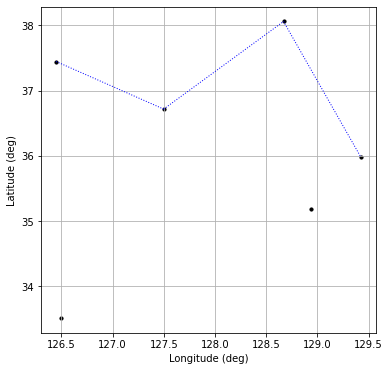

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import collections
import numpy as np
import csv


lines_draw=collections.LineCollection(shortest_lines_zip,  linestyles='dotted', linewidth=1, color = 'blue')

fig,axes=plt.subplots(figsize=(6,6))
plt.grid(True)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')

axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
axes.add_collection(lines_draw)
plt.scatter(lines_x, lines_y, marker='o', color='black', s=10)
axes.autoscale()
plt.show()


# save_result_plot

In [125]:
plt.savefig('name.png')

<Figure size 600x300 with 0 Axes>

# 참고용_ 보고서 쓸때 사용가능

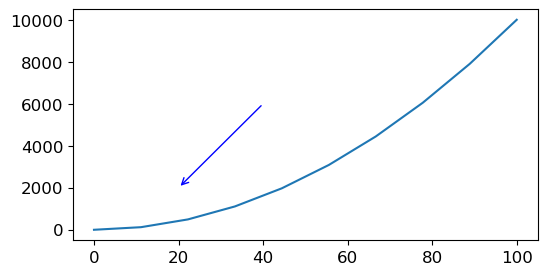

In [37]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 100, 10)
Y = X**2
## annotate('쓰고싶은말', ha = '')

plt.annotate('', ha = 'center', va = 'bottom', 
             xytext = (40, 6000), 
             xy = (20, 2000),
             arrowprops = {'edgecolor':'b', 'arrowstyle':'->'}
            )
plt.plot(X, Y)
plt.show()

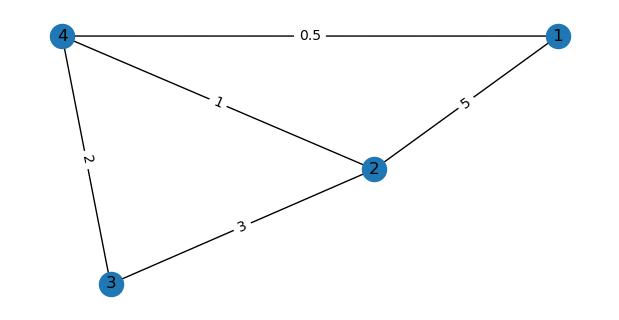

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# 원하는 파라미터 이름 = 실수 (**kwds)
G.add_edge(1, 2, weight=5)
G.add_edge(2, 3, weight=3)
G.add_edge(3, 4, weight=2)
G.add_edge(2, 4, weight=1)
G.add_edge(1, 4, weight=0.5)

# 아래는 그래프로 그리는 법
pos=nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)

# edge 라벨은 weight 값을 가져온다.
labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()